In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn import decomposition
import math

In [2]:
def return_list_of_data(bpt = 2000,n_components=2,split_percent=70):
    data_dir = os.getcwd()+'\\'
    lis_folders = ['AbdomenCT','BreastMRI','ChestCT','CXR','Hand','HeadCT']
    X = []
    cur_class = 0
    for folder in lis_folders:
        i=0
        lis_files = os.listdir(data_dir+folder+'\.')
        im = []
        for files in lis_files:
            i+=1
            if(i==bpt+1):
                break
            img = '\\'.join([data_dir,folder,files])
            image = plt.imread(img)
            im.append(image.flatten().reshape(-1,1))
        im_np = np.array(im)[:,:,0]
        im_np = np.append(im_np,cur_class*np.ones((im_np.shape[0],1)),axis=1)
        cur_class+=1
        X.append(im_np)

    X_data_all = X[0]
    for x in X[1:]: 
        X_data_all = np.append(X_data_all,x,axis=0)
    
    np.random.shuffle(X_data_all)
    
    X_,y_ = X_data_all[:,:-1] , X_data_all[:,-1].reshape(-1,1)

    datasize = X_.shape[0]

    split_point = split_percent//10

    X_train = X_[:(datasize*split_point)//10,:]
    y_train = y_[:(datasize*split_point)//10,:]
    X_test = X_[(datasize*split_point)//10:,:]
    y_test = y_[(datasize*split_point)//10:,:]
    
    pca = decomposition.PCA(n_components)

    pca.fit(X_train)
    X_train_pca = np.zeros((X_train.shape[0],n_components))
    X_test_pca = np.zeros((X_test.shape[0],n_components))
    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)

    return(X_train_pca,y_train,X_test_pca,y_test)



def one_hot(y,num_feats):
    y = y.reshape(-1,1)
    print(y)
    ret = np.zeros((y.shape[0],num_feats))
    rows = np.arange(y.shape[0])
    # print(y)
    # print(rows)
    ret[ rows , y[:,0].astype(int)] = 1
    return ret
    

In [3]:
def confusion_matrix(y_pred,y_test):
    cm = np.zeros((6,6))
    for i in range(y_pred.shape[0]):
        cm[y_test[i,0].astype(int),y_pred[i,0]]+=1
    return cm

In [20]:
X_train_pca,y_train,X_test_pca,y_test = return_list_of_data(bpt=2000,n_components=1)
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train.shape)

IndexError: too many indices for array

In [34]:
def naiveBaiyes(X_train_pca,y_train,X_test_pca,y_test,n_class=6,xxx=1):
    class_mean = []
    class_var = []
    for i in range(n_class):
        X_class = X_train_pca[y_train[:,0]==i]
        cm = np.sum(X_class,axis=0).reshape(1,-1) / X_class.shape[0]
        cv = np.sqrt(np.sum(np.square(X_class-cm),axis=0).reshape(1,-1) / X_class.shape[0])
        # print(X_test_pca.shape)
        class_mean.append(cm)
        class_var.append(cv)
    
    probs = []
    for i in range(n_class):
        prob = np.zeros((X_test_pca.shape[0],1))
        X_class = X_test_pca
        prob_ind = (1/(2*math.pi))*np.exp(  (-1/2) * np.square(X_class-class_mean[i])/class_var[i])     /class_var[i]
        for j in range(1,prob_ind.shape[1]):
            prob_ind[:,0] = prob_ind[:,0] * prob_ind[:,j]
        probs.append(prob_ind[:,0].reshape(-1,1))
    probabs = np.transpose(np.array(probs)[:,:,0])
    probabs[:,0] = probabs[:,0] / xxx
    y_pred = np.argmax(probabs,axis=1).reshape(-1,1)
    # print(y_pred[:20,0])

    print('Accuracy: {}'.format( 100*y_pred[y_pred[:,0]==y_test[:,0]].shape[0]/y_test.shape[0]    ))
    ac = 100*y_pred[y_pred[:,0]==y_test[:,0]].shape[0]/y_test.shape[0]
    return(confusion_matrix(y_pred,y_test),ac)

In [32]:
al = []
cm = []
for i in range(2,3):
    print('for {} number of components- '.format(i))
    X_train_pca,y_train,X_test_pca,y_test = return_list_of_data(bpt=5000,n_components=i)
    a,b = naiveBaiyes(X_train_pca,y_train,X_test_pca,y_test)
    al.append(b)
    cm.append(a)


for 2 number of components- 
Accuracy: 84.31111111111112


In [48]:
al = []
cm = []
for i in np.arange(1,4.05,0.05):
    print('for {} number of components- '.format(i))
    X_train_pca,y_train,X_test_pca,y_test = return_list_of_data(bpt=1000,n_components=2)
    a,b = naiveBaiyes(X_train_pca,y_train,X_test_pca,y_test,xxx=i)
    al.append(b)
    cm.append(a)

for 1.0 number of components- 
Accuracy: 85.44444444444444
for 1.05 number of components- 
Accuracy: 86.0
for 1.1 number of components- 
Accuracy: 85.61111111111111
for 1.1500000000000001 number of components- 
Accuracy: 83.77777777777777
for 1.2000000000000002 number of components- 
Accuracy: 83.88888888888889
for 1.2500000000000002 number of components- 
Accuracy: 84.11111111111111
for 1.3000000000000003 number of components- 
Accuracy: 84.11111111111111
for 1.3500000000000003 number of components- 
Accuracy: 83.88888888888889
for 1.4000000000000004 number of components- 
Accuracy: 83.55555555555556
for 1.4500000000000004 number of components- 
Accuracy: 83.27777777777777
for 1.5000000000000004 number of components- 
Accuracy: 84.22222222222223
for 1.5500000000000005 number of components- 
Accuracy: 84.05555555555556
for 1.6000000000000005 number of components- 
Accuracy: 83.55555555555556
for 1.6500000000000006 number of components- 
Accuracy: 85.0
for 1.7000000000000006 number of c

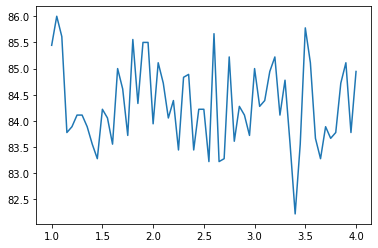

In [49]:
x = np.arange(1,4.05,0.05)
plt.plot(x,al)

In [50]:
print(cm[-1])

[[285.   0.   0.   0.   0.   0.]
 [ 57. 238.   0.   0.   0.   0.]
 [  0.   0. 304.   0.   0.   0.]
 [112.   0.   0. 199.   0.   0.]
 [ 43.   0.   0.   5. 249.   2.]
 [ 43.   8.   0.   0.   1. 254.]]


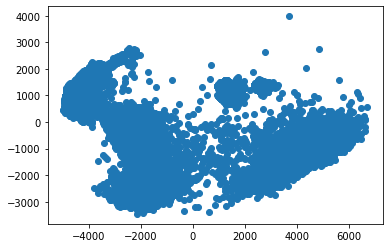

In [83]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
for i in range(1):
    x = X_train_pca[:,0]
    y = X_train_pca[:,1]
    plt.scatter(x, y)
    plt.show()

In [ ]:
a = np.array([[1,2,3,0],[2,2,2,1],[2,3,2,1]])
print(a[a[:,-1]==1][:,:-1])

In [70]:
def ret_n(meu0,meu,cov0,cov,data_size):
    l = cov0
    m = np.linalg.inv(cov0 + (cov/data_size))
    r = cov/data_size
    meu_n = np.dot(np.dot(l,m),np.transpose(meu)) + np.dot(np.dot(r,m),np.transpose(meu0))
    # print(meu_n.shape)
    meu_n = np.transpose(meu_n)
    cov_n = np.dot(np.dot(l,m),r)
    return (meu_n,cov_n)

def MAP(X_train_pca,y_train,X_test_pca,y_test,n_class=6,xxx=10):
    class_mean = []
    class_var = []

    for i in range(n_class):
        meu0 = np.random.random((1,X_train_pca.shape[1]))
        cov0 = np.random.random((X_train_pca.shape[1],X_train_pca.shape[1]))
        cov0 = 0.5*(cov0+np.transpose(cov0))
        cov0 = np.dot(cov0,cov0)
        cov0 = cov0 + X_train_pca.shape[1] * np.identity((X_train_pca.shape[1]))
        cov0 = cov0*100*xxx
        # print(cov0)
        X_class = X_train_pca[y_train[:,0]==i]
        cm = np.sum(X_class,axis=0).reshape(1,-1) / X_class.shape[0]
        X_temp = np.transpose(X_class-cm)
        # print(X_class.shape[0])
        cv = np.dot(X_temp,np.transpose(X_temp)) / X_class.shape[0]
        
        # print(cv.shape)
        # meu0,cov0=cm,cv
        meu_n,cov_n = ret_n(meu0,cm,cov0,cv,data_size=X_class.shape[0])
        # print('cov_n: ',cov_n)
        # print('cov_data: ',cv)
        class_mean.append(meu_n)
        class_var.append(cv)

    for c in class_mean:
        print(c)    
    probs = []
    for i in range(n_class):
        cov = class_var[i]
        meu = class_mean[i]
        X_class = X_test_pca
        konstant = 1/(math.pow((2*math.pi),X_class.shape[1]/2)*(np.abs(np.linalg.det(cov))**0.5))
        prob = konstant * np.exp((-1/2)*np.sum(np.multiply(np.dot(X_class-meu,np.linalg.inv(cov)),X_class-meu),axis=1).reshape(-1,1))
        # print(prob[:20,:])
        probs.append(prob)
        # print(konstant)
    probabs = np.transpose(np.array(probs)[:,:,0])
    y_pred = np.argmax(probabs,axis=1).reshape(-1,1)
    # print(y_pred[:20,0])
    acc= 100*y_pred[y_pred[:,0]==y_test[:,0]].shape[0]/y_test.shape[0]
    print('Accuracy: {}'.format(   acc  ))

    return(y_pred,acc)



In [71]:
al = []
X_train_pca,y_train,X_test_pca,y_test = return_list_of_data(bpt=3000,n_components=2)
for i in range(10,11):
    y_pred,acc = MAP(X_train_pca,y_train,X_test_pca,y_test)
    al.append(acc)

[[ 1279.3312978  -1045.99096443]]
[[-4064.49340903 -1186.16591315]]
[[ 2501.3722467  -1358.03773161]]
[[3418.14027218 1385.41284756]]
[[-749.62485274 1811.41275302]]
[[-2125.83660243   194.62912052]]
Accuracy: 97.48148148148148


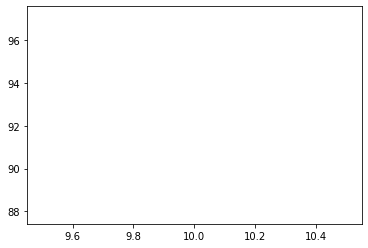

In [61]:
x = list(range(10,11))
plt.plot(x,al)

In [35]:
print('Accuracy: {}'.format(acc))
print('')
print('6 class Confusion matrix-')
print('')
print(confusion_matrix(y_pred,y_test).astype(int))

Accuracy: 97.22222222222223

6 class Confusion matrix-

[[850   0   0   0   0   0]
 [  0 906   0   0   0  13]
 [  0   0 894   0   0   0]
 [  1   0   0 881  12   2]
 [  4   1   1  30 856  31]
 [  0  47   0   0   8 863]]


In [86]:
print( np.multiply(np.ones((2,2)),np.identity((2)))   )

[[1. 0.]
 [0. 1.]]


In [7]:
def sigmoid(X):
    ret = 1/(1+np.exp(-X))
    return ret
def gradDesc(X,y,theta):
    h  = np.dot(X,theta)
    h = sigmoid(h)
    dsc = X.shape[0]
    loss = h-y
    total_loss = np.dot(np.ones((1,dsc)),np.square(loss))[0,0] /dsc
    update = np.dot(np.transpose(X),loss)
    update /= dsc
    return(total_loss,update)

def linreg(X_train_pca,y_train,X_test_pca,y_test,n_class=6,iters=5000,batchSize=32,alpha=0.001):
    thetas = []
    X_mean = np.sum(X_train_pca,axis=0).reshape(1,-1) / X_train_pca.shape[0]
    X_var = np.sqrt(np.sum(np.square(X_train_pca-X_mean),axis=0).reshape(1,-1) / X_train_pca.shape[0])
    X_train_reg = (X_train_pca-X_mean)/X_var
    X_train_reg = np.append(np.ones((X_train_reg.shape[0],1)),X_train_reg,axis=1)
    X_test_reg = (X_test_pca-X_mean)/X_var
    X_test_reg = np.append(np.ones((X_test_reg.shape[0],1)),X_test_reg,axis=1)
    for i in range(n_class):
        print('training class {}'.format(i))
        theta = np.ones((X_train_reg.shape[1],1))*0.1
        X = X_train_reg
        y = np.zeros((y_train.shape[0],1))
        y[y_train[:,0]==i] = 1
        datasize = X.shape[0]
        loss_epoch = 0
        for i in range(iters):
            fro = 0
            loss_epoch = 0
            while(True):
                to = min(fro+batchSize,datasize)
                l,theta_grad = gradDesc(X[fro:to,:],y[fro:to,:],theta)
                # print(theta_grad)
                loss_epoch += l
                theta -= (alpha*theta_grad)
                fro = to

                if(to>=datasize):
                    break
        thetas.append(theta)
    theta_np = np.transpose(np.array(thetas)[:,:,0])
    prob = np.dot(X_test_reg,theta_np).reshape(X_test_reg.shape[0],-1)

    y_pred = np.argmax(prob,axis=1).reshape(-1,1)
    print(y_pred[:20,0])
    acc = 100*y_pred[y_pred[:,0]==y_test[:,0]].shape[0]/y_test.shape[0]
    print('Accuracy: {}'.format( acc    ))
    return acc,y_pred

In [8]:
al = []

In [11]:
for i in range(200,201):
    X_train_pca,y_train,X_test_pca,y_test = return_list_of_data(bpt=2000,n_components=i)
    acc,y_pred= linreg(X_train_pca,y_train,X_test_pca,y_test,batchSize=X_train_pca.shape[0],n_class=6)
    al.append(acc)

training class 0
training class 1
training class 2
training class 3
training class 4
training class 5
[5 1 1 3 4 2 5 4 0 2 4 4 1 5 5 1 5 4 1 4]
Accuracy: 96.44444444444444


In [12]:
print('Accuracy: ',acc)
print('')
print('Confusion Matrix: ')
print('')
print(confusion_matrix(y_pred,y_test))

Accuracy:  96.44444444444444

Confusion Matrix: 

[[558.   0.  41.   0.   0.   0.]
 [  0. 599.   0.   0.   0.   0.]
 [  2.   0. 597.   0.   0.   0.]
 [  0.   0.  13. 592.   3.   4.]
 [  3.   1.   7.   4. 570.  27.]
 [  8.  14.   1.   0.   0. 556.]]


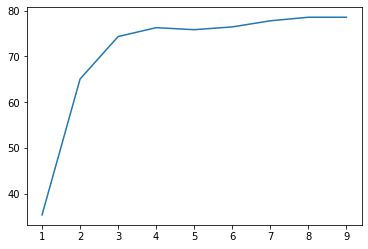

In [8]:
x = np.arange(1,15)
plt.plot(x,al)

In [103]:
def gmm(X_train_pca,y_train,X_test_pca,y_test,n_class=6,iters=100,batchSize=32,alpha=0.001,modes=3):
    params = []
    for i in range(n_class):
        X_class = X_train_pca[y_train[:,0]==i]
        X_class_mean = np.sum(X_class,axis=0).reshape(1,-1) / X_class.shape[0]
        X_class_var = np.dot(np.transpose(X_class-X_class_mean),X_class-X_class_mean).reshape(X_class.shape[1],X_class.shape[1]) / X_class.shape[0]
        class_params = []
        for j in range(modes):
            p0 = 1/modes
            p1 = X_class_mean + 10 * (np.random.random(X_class_mean.shape))
            p2 = X_class_var
            class_params.append([p0,p1,p2])
        params.append(class_params)
    
    for itera in range(iters):
        if((itera+1)%100==0):
            print('iteration number {}'.format(itera))
        class_params_update = []
        for i in range(n_class):
            class_params = params[i]
            X_class = X_train_pca[y_train[:,0]==i]
            all_mode_prob = []
            for m in range(modes):
                p0,p1,p2 = class_params[m]
                ############# p0 removed in the next line
                konstant = (1/(math.pow((2*math.pi),X_class.shape[1]/2)*(np.abs(np.linalg.det(p2))**0.5)))
                prob = konstant*np.exp((-1/2)*np.sum(np.multiply(np.dot(X_class-p1,np.linalg.inv(p2)),X_class-p1),axis=1)).reshape(-1,1)
                all_mode_prob.append(prob)
            # print((all_mode_prob))
            probabs = np.transpose(np.array(all_mode_prob)[:,:,0])
            mode_update = np.argmax(probabs,axis=1).reshape(-1,1)
            mode_update_params = []
            for m in range(modes):
                # print(mode_update.shape)
                X_class_mode = X_class[mode_update[:,0]==m]
                X_class_mean = np.sum(X_class,axis=0).reshape(1,-1) / X_class.shape[0]
                X_class_var = np.dot(np.transpose(X_class_mode-X_class_mean),X_class_mode-X_class_mean).reshape(X_class_mode.shape[1],X_class_mode.shape[1]) / X_class_mode.shape[0]
                X_mode_count_ratio = X_class_mode.shape[0] / X_class.shape[0]
                mode_update_params.append([X_mode_count_ratio,X_class_mean,X_class_var])
            class_params_update.append(mode_update_params)
        params = class_params_update
    # print(params[:][0:6])

    probs_list = []
    for i in range(n_class):
        params_class = params[i]
        mode_wise_prob_list = []
        for m in range(modes):
            p0,p1,p2 = params_class[m]
            X_class = X_test_pca
            konstant = p0*(1/(math.pow((2*math.pi),X_class.shape[1]/2)*(np.abs(np.linalg.det(p2))**0.5)))
            prob = konstant*np.exp((-1/2)*np.sum(np.multiply(np.dot(X_class-p1,np.linalg.inv(p2)),X_class-p1),axis=1)).reshape(-1,1)
            mode_wise_prob_list.append(prob)
            # print(np.array(mode_wise_prob_list).shape)
        mode_wise_prob = np.transpose(np.array(mode_wise_prob_list)[:,:,0])
        class_prob = np.sum(mode_wise_prob,axis=1).reshape(-1,1)
        probs_list.append(class_prob)
    probabs = np.transpose(np.array(probs_list)[:,:,0])
    y_pred = np.argmax(probabs,axis=1).reshape(-1,1)

    # print(y_pred[:20,0])
    # print(y_test[:20,0].astype(int))
    # print(X_test_pca[:20,:])
    # print(y_pred.shape,y_test.shape)
    acc = 100*y_pred[y_pred[:,0]==y_test[:,0].astype(int)].shape[0] /y_test.shape[0]
    print('Accuracy: {}'.format( acc  ))
    return acc


In [127]:
al_modes = []
for i in range(1,11):
    X_train_pca,y_train,X_test_pca,y_test = return_list_of_data(bpt=1000,n_components=5)
    acc = gmm(X_train_pca,y_train,X_test_pca,y_test,n_class=6,iters=99,batchSize=32,alpha=0.001,modes=i)
    al1.append(acc)

Accuracy: 99.05555555555556
Accuracy: 99.11111111111111
Accuracy: 99.11111111111111
Accuracy: 99.33333333333333
Accuracy: 99.44444444444444
Accuracy: 16.88888888888889
Accuracy: 16.11111111111111
Accuracy: 16.77777777777778
Accuracy: 15.944444444444445
Accuracy: 99.33333333333333


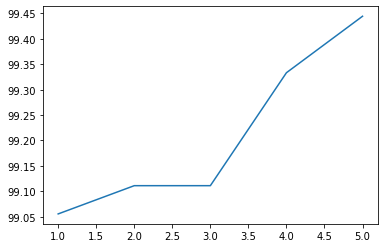

In [132]:
x = list(range(1,6))
plt.plot(x,al1[-10:-5])

In [125]:
print(al)
print(al1)

[16.47222222222222, 16.88888888888889, 17.416666666666668, 16.055555555555557, 99.19444444444444, 99.36111111111111, 99.33333333333333, 99.55555555555556, 99.52777777777777, 99.66666666666667, 16.666666666666668, 16.944444444444443, 17.166666666666668, 99.16666666666667, 99.22222222222223, 99.5, 99.61111111111111, 99.66666666666667, 99.61111111111111, 99.44444444444444]
[81.88888888888889, 97.61111111111111, 97.61111111111111, 99.0, 99.05555555555556, 99.33333333333333, 99.08333333333333, 99.19444444444444, 99.16666666666667, 99.30555555555556]
